<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/desafio_modulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
nome_do_arquivo="comp_bikes_mod.csv"
base = pd.read_csv(nome_do_arquivo)

In [5]:
base.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [6]:
base.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [106]:
base.shape

(17379, 17)

In [80]:
base[['temp']].isna().sum()

temp    1738
dtype: int64

In [79]:
(base[['temp']].isna().sum() / 17378) * 100

temp    10.001151
dtype: float64

In [85]:
base.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [4]:
# Elimina as linhas com NAN de uma coluna especificada e atualiza o dataset
base.dropna(subset = ["dteday"], inplace=True)

In [109]:
base[['temp']].mean()

temp    0.496926
dtype: float64

In [110]:
base[['windspeed']].std()

windspeed    0.122309
dtype: float64

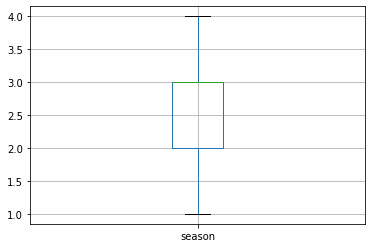

In [113]:
base[["season"]].boxplot()

In [5]:
base.loc[base.season == 1, 'season'] = 'winter'
base.loc[base.season == 2, 'season'] = 'spring'
base.loc[base.season == 3, 'season'] = 'summer'
base.loc[base.season == 4, 'season'] = 'fall'

In [138]:
base.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,winter,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17376,17377.0,NaN,winter,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,NaN,2012-12-31,winter,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


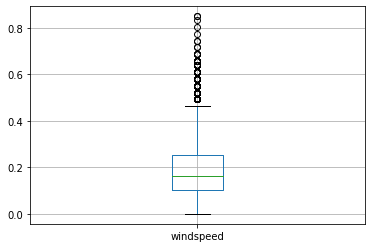

In [139]:
#Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
base[["windspeed"]].boxplot()

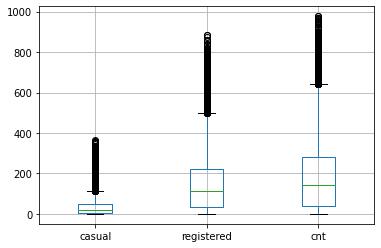

In [14]:
base[["casual","registered","cnt"]].boxplot()

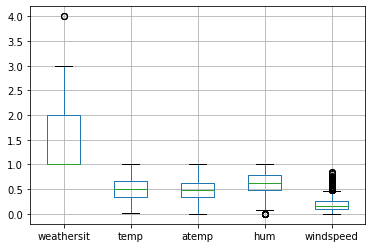

In [13]:
base[["weathersit","temp","atemp","hum","windspeed"]].boxplot()

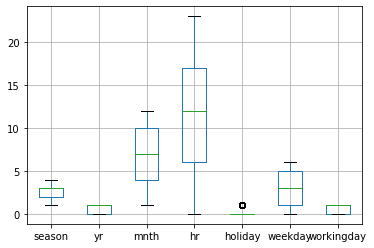

In [11]:
base[["season","yr","mnth","hr","holiday","weekday","workingday"]].boxplot()

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
sns.set_style("whitegrid")
labels = ['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

base_nova = base[labels].dropna()
base_nova.columns = labels


In [151]:
base_nova.head()

,season,temp,atemp,hum,windspeed,cnt
1,winter,0.22,0.2727,0.80,0.0000,40.0
2,winter,0.22,0.2727,0.80,0.0000,32.0
3,winter,0.24,0.2879,0.75,0.0000,13.0
4,winter,0.24,0.2879,0.75,0.0000,1.0
5,winter,0.24,0.2576,0.75,0.0896,1.0


In [154]:
corr = base_nova.corr()
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987207,-0.071005,-0.018125,0.405267
atemp,0.987207,1.000000,-0.052704,-0.057431,0.401340
hum,-0.071005,-0.052704,1.000000,-0.294584,-0.329904
windspeed,-0.018125,-0.057431,-0.294584,1.000000,0.100100
cnt,0.405267,0.401340,-0.329904,0.100100,1.000000


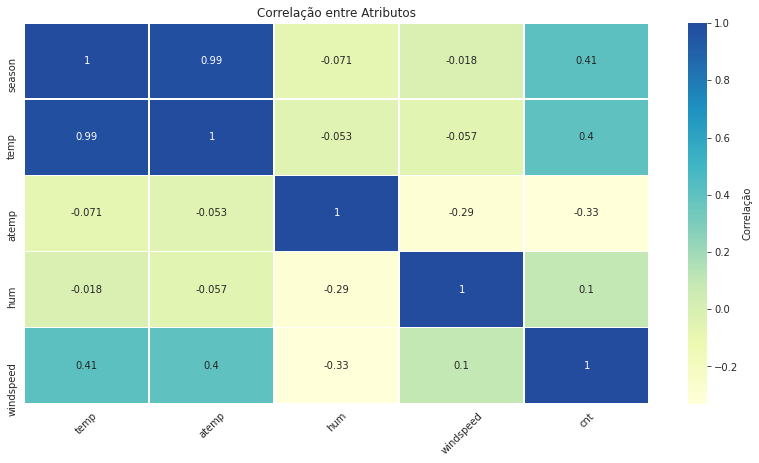

In [155]:
f, ax = plt.subplots(figsize=(14, 7))
plt.title("Correlação entre Atributos")
heat_map = sns.heatmap(corr, 
            annot=True, 
            linewidths=.5, 
            cmap="YlGnBu", 
            center=0.5, 
            ax=ax, 
            cbar_kws={'label': 'Correlação'})

heat_map.set_yticklabels(labels)
heat_map.set_xticklabels(heat_map.get_xticklabels(), 
                         rotation=45, 
                         horizontalalignment='center')
plt.show()

In [6]:
base[["hum"]] = base[["hum"]].fillna(base[["hum"]].mean(), inplace=False)
base[["cnt"]] = base[["cnt"]].fillna(base[["cnt"]].mean(), inplace=False)
base[["casual"]] = base[["casual"]].fillna(base[["casual"]].mean(), inplace=False)


In [7]:
base

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,winter,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.000000,32.0,40.0
2,3.0,2011-01-01,winter,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.000000,27.0,32.0
3,4.0,2011-01-01,winter,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.000000,10.0,13.0
4,5.0,2011-01-01,winter,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.000000,1.0,1.0
5,6.0,2011-01-01,winter,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,winter,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.000000,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.000000,108.0,119.0
17375,17376.0,2012-12-31,winter,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,35.416317,NaN,89.0
17377,NaN,2012-12-31,winter,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.000000,48.0,61.0


In [21]:
# Variável independente
X = base.loc[:, ['hum', 'casual']].values


# Variável dependente
Y = base.loc[:, 'cnt'].values

from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(X, 
                                                                  Y,
                                                                  test_size = 0.3,
                                                                  random_state = 211)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)

score = regressor.score(x_treinamento, y_treinamento)

previsoes = regressor.predict(x_teste)

In [9]:
from sklearn.metrics import mean_absolute_error

mean_abs_error = mean_absolute_error(y_teste, previsoes)

In [10]:
mean_abs_error

93.17184692676099

In [11]:
regressor.score(x_teste, y_teste)

0.4111116386758532

In [12]:
regressor.intercept_

176.50615854302276

In [13]:
from sklearn.metrics import r2_score
r2_score(y_teste, previsoes)

0.4111116386758532

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 0.94384042, -0.59269935],
       [ 0.94384042, -0.65755482],
       [ 0.6704893 , -0.7007918 ],
       ...,
       [-0.14956406,  0.        ],
       [-0.36824495, -0.48460691],
       [ 0.12378706, -0.5062254 ]])

In [23]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(X, 
                                                                  Y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_treinamento, y_treinamento)

score = regressor.score(x_treinamento, y_treinamento)

previsoes = regressor.predict(x_teste)

In [24]:
mean_abs_error = mean_absolute_error(y_teste, previsoes)
mean_abs_error

103.3332969683345

In [25]:
regressor.score(x_teste, y_teste)

0.18992843409508287

In [26]:
from sklearn.metrics import r2_score
r2_score(y_teste, previsoes)

0.18992843409508287

In [50]:
indice = [i for i in range(1, 17380)]

In [51]:
base[["instant"]] = indice

In [54]:
base[["instant"]].head()

,instant
0,1
1,2
2,3
3,4
4,5


In [55]:
base[["instant"]].tail()

,instant
17374,17375
17375,17376
17376,17377
17377,17378
17378,17379


In [21]:
base[["casual"]].fillna(round(base[["casual"]].mean()), inplace=False)

,casual
0,3.0
1,8.0
2,5.0
3,3.0
4,0.0
...,...
17374,11.0
17375,36.0
17376,7.0
17377,13.0


In [59]:
base[["dteday"]].fillna('2011-01-01', inplace=False)

,dteday
0,2011-01-01
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
...,...
17374,2012-12-31
17375,2012-12-31
17376,2011-01-01
17377,2012-12-31
